In [1]:
cd ~/Desktop/DeepLearningPilot/

/Users/jz-rolling/Desktop/DeepLearningPilot


In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from skimage import filters,morphology
from scipy.stats import pearsonr
import seaborn as sns
from ncolor import label
from timeit import default_timer
import pickle as pk, glob, os
import momia2 as mo
from ncolor import label
from matplotlib import cm

In [3]:
# generate momia tracker objects
for k in sorted(glob.glob('/Volumes/JZSSD_temp/20190709_NQTF/pred_results/*_clips.npy')):
    try:
        header = k.split('_clips.npy')[0]
        if not os.path.isfile(header+'_tracker.pk'):
            images = np.load(k)
            mask = np.load(header+'_omni_masks.npy')
            flow = np.load(header+'_omni_flows.npy',allow_pickle=True)
            frames=[]
            for i in range(90):
                p=mo.Patch()
                p.load_data(i,{'C1':images[i]},
                                ref_channel='C1')
                labeled_mask = morphology.remove_small_objects(mask[i],50)
                p.mask = labeled_mask>0
                p.labeled_mask = labeled_mask
                h,w = labeled_mask.shape
                prob_mask = np.zeros([h,w,3])
                prob_mask[:,:,2] = mo.classify.classifier_helper.normalize_image(flow[i][2],min_perc=0.01,max_perc=100,max_v=None,min_v=None)
                prob_mask[:,:,0] = 1-p.mask
                p.prob_mask = prob_mask
                p.locate_particles(precompute_contours=False)
                frames.append(p)


            tracker_msm = mo.core.CellTracker(frames,np.arange(len(frames)),
                                              None,
                                              verbose=False,
                                              seed_prob_min=0.7,
                                              max_iter=5,
                                              min_cell_size=50,
                                              min_overlap_area=80,
                                              backtrack_generations=5,
                                              min_overlap_threshold=0.3,
                                              min_size_similarity=0.7,
                                              no_split=False,hard_split=True)
            tracker_msm.link_cells()
            for i in range(2):
                tracker_msm.refine_trace()
                tracker_msm.link_cells()
                tracker_msm.trace_lineage()
            for p in tracker_msm.frames:
                p.locate_particles(precompute_contours=True)
                p.refine_contours(update_mask=False,approximate=False,step_range=(-1.5,0),n_steps=5,
                                  smoothing='moving_window',smooth_factor=1,
                                  verbose=False)
            tracker_msm.link_cells()
            tracker_msm.trace_lineage()
            pk.dump(tracker_msm.regionprops,open(header+'_tracker.pk','wb'))
    except:
        print(k)

/Users/jz-rolling/opt/anaconda3/envs/keras_pilot/lib/python3.8/site-packages/skimage/_shared/utils.py:157: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  return func(*args, **kwargs)


/Volumes/JZSSD_temp/20190709_NQTF/pred_results/12_0187-0981-1443_clips.npy
Rectification failed for cell 42_1.
Rectification failed for cell 15_7.
Rectification failed for cell 10_6.
Rectification failed for cell 23_1.
Rectification failed for cell 24_1.
Rectification failed for cell 28_6.
Rectification failed for cell 28_24.
Rectification failed for cell 29_25.
Rectification failed for cell 30_27.
Rectification failed for cell 31_28.
Rectification failed for cell 32_27.
Rectification failed for cell 16_21.
Rectification failed for cell 18_5.
Rectification failed for cell 28_13.
Rectification failed for cell 29_13.
Rectification failed for cell 30_13.
Rectification failed for cell 31_14.
Rectification failed for cell 32_14.
Rectification failed for cell 33_14.
Rectification failed for cell 34_14.
Rectification failed for cell 21_4.
Rectification failed for cell 20_11.
Rectification failed for cell 10_15.
Rectification failed for cell 21_4.
Rectification failed for cell 32_10.
Rectifica

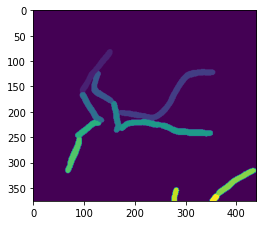

In [8]:
header = sample_dict['1_0'][3]
images = sample_dict['1_0'][0]
mask = np.load(header+'_omni_masks.npy')
flow = np.load(header+'_omni_flows.npy',allow_pickle=True)
frames=[]
for i in range(5,90):
    p=mo.Patch()
    p.load_data(i,{'C1':images[i]},
                    ref_channel='C1')
    labeled_mask = morphology.remove_small_objects(mask[i],50)
    p.mask = labeled_mask>0
    p.labeled_mask = labeled_mask
    h,w = labeled_mask.shape
    prob_mask = np.zeros([h,w,3])
    prob_mask[:,:,2] = mo.classify.classifier_helper.normalize_image(flow[i][2],min_perc=0.01,max_perc=100,max_v=None,min_v=None)
    prob_mask[:,:,0] = 1-p.mask
    p.prob_mask = prob_mask
    p.locate_particles(precompute_contours=False)
    #p.extract_midlines(contour_key='$contours')
    frames.append(p)


tracker_msm = mo.core.CellTracker(frames,np.arange(len(frames)),
                                  None,
                                  verbose=False,
                                  seed_prob_min=0.7,
                                  max_iter=5,
                                  min_cell_size=50,
                                  min_overlap_area=80,
                                  backtrack_generations=5,
                                  min_overlap_threshold=0.3,
                                  min_size_similarity=0.7,
                                  no_split=False,hard_split=True)
tracker_msm.link_cells()
#"""
tracker_msm.link_cells()
fig=plt.figure(figsize=(4,4))
plt.imshow(tracker_msm.frames[15].labeled_mask)
for i in range(3):
    tracker_msm.refine_trace()
    tracker_msm.link_cells()
    tracker_msm.trace_lineage()
for p in tracker_msm.frames:
    p.locate_particles(precompute_contours=True)
    p.refine_contours(update_mask=False,approximate=False,step_range=(-1.5,0),n_steps=5,
                      smoothing='moving_window',smooth_factor=1,
                      verbose=False)
tracker_msm.link_cells()
tracker_msm.trace_lineage()
    #fig=plt.figure(figsize=(4,4))
    #plt.imshow(tracker_msm.frames[15].labeled_mask)
#"""

In [10]:
k = '1_0'
folder = '/Volumes/JZSSD_temp/20190709_NQTF/trace_plot/{}/'.format(k)
merged_rp=tracker_msm.regionprops
unique_cells = merged_rp['cell_lineage'].unique()
count_dict = {}
for x in unique_cells:
    rid = x.split('.')[0]
    if not rid in count_dict:
        count_dict[rid]=1
    else:
        count_dict[rid]+=1
#filter count
color_count = 0
color_dict = {}
for i,(ac,count) in enumerate(count_dict.items()):
    if count>2:
        color_dict[ac]=cm.get_cmap('tab20')(color_count)
        color_count+=1

for t in merged_rp['$time'].unique():
    #img=label(tracker_msm.frames[t].labeled_mask)
    img = sample_dict[k][0][t+5]
    h,w = img.shape
    fig=plt.figure(figsize=(w/50,h/50))
    plt.imshow(img,cmap='gist_gray')
    subset = merged_rp[merged_rp['$time']==t].copy()
    for l in subset['cell_lineage'].unique():
        anc = l.split('.')[0]
        if anc in color_dict:
            color=color_dict[anc]
            cell = subset[subset['cell_lineage']==l].copy()
            for c in cell.index:
                x1,y1,contours,touching_edge = cell.loc[c,['$opt-x1','$opt-y1','$refined_contours','$touching_edge']].values
                if len(contours)>0:
                    if len(contours[0])>10:
                        #contours = [mo.utils.contour.contour_moving_window_smoothing(contours[0])]
                        #simp_contour=mo.core.patch.approximate_polygon(contour,tolerance=0.5)
                        xc,yc = contours[0].T
                        xc = xc+x1
                        yc = yc+y1
                        plt.fill(yc,xc,fc=color,ec=None,alpha=0.4)
                        plt.plot(yc,xc,color=color,lw=1.5,alpha=1)
    plt.axis('off')
    plt.savefig('{}{}.png'.format(folder,t+5),bbox_inches='tight')
    plt.close()